Tamrin1

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

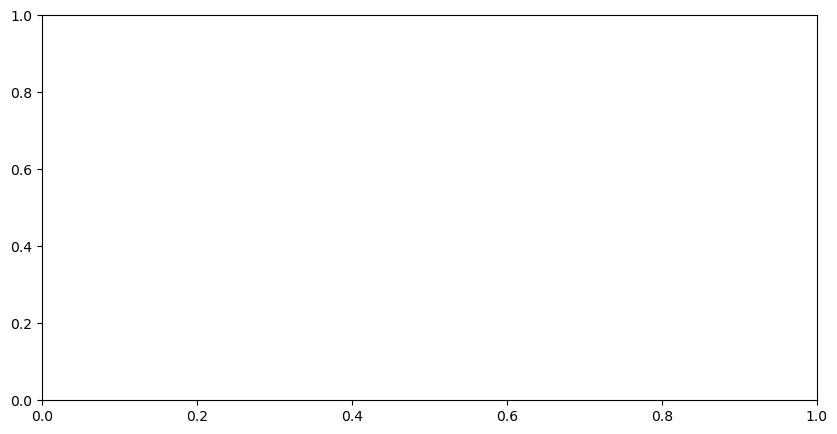

In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt



# Define antecedents and consequents
self.e = ctrl.Antecedent(np.arange(-1.5, 1.5, 1), f'{joint_name}_e')
self.ec = ctrl.Antecedent(np.arange(-1.5, 1.5, 1), f'{joint_name}_ec')
self.Kp = ctrl.Consequent(np.arange(-1.5, 1.5, 1), f'{joint_name}_Kp')
self.Ki = ctrl.Consequent(np.arange(-0.5, 0.5, 0.1), f'{joint_name}_Ki')
self.Kd = ctrl.Consequent(np.arange(-1.5, 1.5, 1), f'{joint_name}_Kd')

# Membership functions for 'e'
self.e['NB'] = fuzz.trimf(self.e.universe, [-1.5, -1.5, -0.75])
self.e['NM'] = fuzz.trimf(self.e.universe, [-1.5, -0.75, 0])
self.e['NS'] = fuzz.trimf(self.e.universe, [-0.75, 0, 0.75])
self.e['ZO'] = fuzz.trimf(self.e.universe, [-1.5, 0, 1.5])
self.e['PS'] = fuzz.trimf(self.e.universe, [0, 0.75, 1.5])
self.e['PM'] = fuzz.trimf(self.e.universe, [0.75, 1.5, 1.5])
self.e['PB'] = fuzz.trimf(self.e.universe, [0.75, 1.5, 1.5])

# Membership functions for 'ec'
self.ec['NB'] = fuzz.trimf(self.ec.universe, [-1.5, -1.5, -0.75])
self.ec['NM'] = fuzz.trimf(self.ec.universe, [-1.5, -0.75, 0])
self.ec['NS'] = fuzz.trimf(self.ec.universe, [-0.75, 0, 0.75])
self.ec['ZO'] = fuzz.trimf(self.ec.universe, [-1.5, 0, 1.5])
self.ec['PS'] = fuzz.trimf(self.ec.universe, [0, 0.75, 1.5])
self.ec['PM'] = fuzz.trimf(self.ec.universe, [0.75, 1.5, 1.5])
self.ec['PB'] = fuzz.trimf(self.ec.universe, [0.75, 1.5, 1.5])

# Membership functions for 'Kp', 'Ki', 'Kd' (similar to above)
# Add the membership functions for Kp, Ki, Kd here...
def plot_membership_functions(antecedent):
    plt.figure(figsize=(10, 5))
    for label in antecedent.terms:
        plt.plot(antecedent.universe, antecedent[label], label=label)
    plt.title(f'Membership Functions for {antecedent.label}')
    plt.xlabel(antecedent.label)
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid()
    plt.show()

# Plot membership functions for each variable
plot_membership_functions(self.e)
plot_membership_functions(self.ec)
plot_membership_functions(self.Kp)
plot_membership_functions(self.Ki)
plot_membership_functions(self.Kd)


Class for fuzzification of errors and error deviations and calculate the PID controller

In [9]:
class JointFuzzyPIDController:
    def __init__(self, joint_name):
        # Define fuzzy variables for input and output for each joint
        self.e = ctrl.Antecedent(np.arange(-1.5, 1.5, 1), f'{joint_name}_e')
        self.ec = ctrl.Antecedent(np.arange(-1.5, 1.5, 1), f'{joint_name}_ec')
        self.Kp = ctrl.Consequent(np.arange(-1.5, 1.5, 1), f'{joint_name}_Kp')
        self.Ki = ctrl.Consequent(np.arange(-0.5, 0.5, 0.1), f'{joint_name}_Ki')
        self.Kd = ctrl.Consequent(np.arange(-1.5, 1.5, 1), f'{joint_name}_Kd')
        
        # Initialize membership functions
        self._init_membership_functions()
        
        # Initialize rule base
        self._init_rules_kp()
        self._init_rules_ki()
        self._init_rules_kd()
        
        # Create control system and simulation for each joint
        self.ctrl_kp = ctrl.ControlSystem(self.kp_rules)
        self.ctrl_ki = ctrl.ControlSystem(self.ki_rules)
        self.ctrl_kd = ctrl.ControlSystem(self.kd_rules)
        self.sim_kp = ctrl.ControlSystemSimulation(self.ctrl_kp)
        self.sim_ki = ctrl.ControlSystemSimulation(self.ctrl_ki)
        self.sim_kd = ctrl.ControlSystemSimulation(self.ctrl_kd)
     
    
    def _init_membership_functions(self):
        # Membership functions for 'e'
        self.e['NB'] = fuzz.trimf(self.e.universe, [-1.5, -1.5, -0.75])
        self.e['NM'] = fuzz.trimf(self.e.universe, [-1.5, -0.75, 0])
        self.e['NS'] = fuzz.trimf(self.e.universe, [-0.75, 0, 0.75])
        self.e['ZO'] = fuzz.trimf(self.e.universe, [-1.5, 0, 1.5])
        self.e['PS'] = fuzz.trimf(self.e.universe, [0, 0.75, 1.5])
        self.e['PM'] = fuzz.trimf(self.e.universe, [0.75, 1.5, 1.5])
        self.e['PB'] = fuzz.trimf(self.e.universe, [0.75, 1.5, 1.5])

        # Membership functions for 'ec'
        self.ec['NB'] = fuzz.trimf(self.ec.universe, [-1.5, -1.5, -0.75])
        self.ec['NM'] = fuzz.trimf(self.ec.universe, [-1.5, -0.75, 0])
        self.ec['NS'] = fuzz.trimf(self.ec.universe, [-0.75, 0, 0.75])
        self.ec['ZO'] = fuzz.trimf(self.ec.universe, [-1.5, 0, 1.5])
        self.ec['PS'] = fuzz.trimf(self.ec.universe, [0, 0.75, 1.5])
        self.ec['PM'] = fuzz.trimf(self.ec.universe, [0.75, 1.5, 1.5])
        self.ec['PB'] = fuzz.trimf(self.ec.universe, [0.75, 1.5, 1.5])
    
        # Membership functions for ΔKp
        self.Kp['NB'] = fuzz.trimf(self.Kp.universe, [-1.5, -1.5, -0.75])
        self.Kp['NM'] = fuzz.trimf(self.Kp.universe, [-1.5, -0.75, 0])
        self.Kp['NS'] = fuzz.trimf(self.Kp.universe, [-0.75, 0, 0.75])
        self.Kp['ZO'] = fuzz.trimf(self.Kp.universe, [-1.5, 0, 1.5])
        self.Kp['PS'] = fuzz.trimf(self.Kp.universe, [0, 0.75, 1.5])
        self.Kp['PM'] = fuzz.trimf(self.Kp.universe, [0.75, 1.5, 1.5])
        self.Kp['PB'] = fuzz.trimf(self.Kp.universe, [0.75, 1.5, 1.5])
    
        # Membership functions for ΔKi
        self.Ki['NB'] = fuzz.trimf(self.Ki.universe, [-0.5, -0.5, -0.25])
        self.Ki['NM'] = fuzz.trimf(self.Ki.universe, [-0.5, -0.25, 0])
        self.Ki['NS'] = fuzz.trimf(self.Ki.universe, [-0.25, 0, 0.25])
        self.Ki['ZO'] = fuzz.trimf(self.Ki.universe, [-0.5, 0, 0.5])
        self.Ki['PS'] = fuzz.trimf(self.Ki.universe, [0, 0.25, 0.5])
        self.Ki['PM'] = fuzz.trimf(self.Ki.universe, [0.25, 0.5, 0.5])
        self.Ki['PB'] = fuzz.trimf(self.Ki.universe, [0.25, 0.5, 0.5])
    
        # Membership functions for ΔKd
        self.Kd['NB'] = fuzz.trimf(self.Kd.universe, [-1.5, -1.5, -0.75])
        self.Kd['NM'] = fuzz.trimf(self.Kd.universe, [-1.5, -0.75, 0])
        self.Kd['NS'] = fuzz.trimf(self.Kd.universe, [-0.75, 0, 0.75])
        self.Kd['ZO'] = fuzz.trimf(self.Kd.universe, [-1.5, 0, 1.5])
        self.Kd['PS'] = fuzz.trimf(self.Kd.universe, [0, 0.75, 1.5])
        self.Kd['PM'] = fuzz.trimf(self.Kd.universe, [0.75, 1.5, 1.5])
        self.Kd['PB'] = fuzz.trimf(self.Kd.universe, [0.75, 1.5, 1.5])

    
    def _init_rules_kp(self):
        # Define rules
        self.kp_rules = [
            ctrl.Rule(self.e['PB'] & self.ec['NB'], self.Kp['ZO']),
            ctrl.Rule(self.e['PB'] & self.ec['NM'], self.Kp['ZO']),
            ctrl.Rule(self.e['PB'] & self.ec['NS'], self.Kp['NS']),
            ctrl.Rule(self.e['PB'] & self.ec['ZO'], self.Kp['NM']),
            ctrl.Rule(self.e['PB'] & self.ec['PS'], self.Kp['NM']),
            ctrl.Rule(self.e['PB'] & self.ec['PM'], self.Kp['NB']),
            ctrl.Rule(self.e['PB'] & self.ec['PB'], self.Kp['NB']),
            ctrl.Rule(self.e['PM'] & self.ec['NB'], self.Kp['PS']),
            ctrl.Rule(self.e['PM'] & self.ec['NM'], self.Kp['ZO']),
            ctrl.Rule(self.e['PM'] & self.ec['NS'], self.Kp['NS']),
            ctrl.Rule(self.e['PM'] & self.ec['ZO'], self.Kp['NM']),
            ctrl.Rule(self.e['PM'] & self.ec['PS'], self.Kp['NM']),
            ctrl.Rule(self.e['PM'] & self.ec['PM'], self.Kp['NM']),
            ctrl.Rule(self.e['PM'] & self.ec['PB'], self.Kp['NB']),
            ctrl.Rule(self.e['PS'] & self.ec['NB'], self.Kp['PS']),
            ctrl.Rule(self.e['PS'] & self.ec['NM'], self.Kp['PS']),
            ctrl.Rule(self.e['PS'] & self.ec['NS'], self.Kp['ZO']),
            ctrl.Rule(self.e['PS'] & self.ec['ZO'], self.Kp['NS']),
            ctrl.Rule(self.e['PS'] & self.ec['PS'], self.Kp['NM']),
            ctrl.Rule(self.e['PS'] & self.ec['PM'], self.Kp['NM']),
            ctrl.Rule(self.e['PS'] & self.ec['PB'], self.Kp['NM']),
            ctrl.Rule(self.e['ZO'] & self.ec['NB'], self.Kp['PM']),
            ctrl.Rule(self.e['ZO'] & self.ec['NM'], self.Kp['PM']),
            ctrl.Rule(self.e['ZO'] & self.ec['NS'], self.Kp['PS']),
            ctrl.Rule(self.e['ZO'] & self.ec['ZO'], self.Kp['ZO']),
            ctrl.Rule(self.e['ZO'] & self.ec['PS'], self.Kp['NS']),
            ctrl.Rule(self.e['ZO'] & self.ec['PM'], self.Kp['NS']),
            ctrl.Rule(self.e['ZO'] & self.ec['PB'], self.Kp['NM']),
            ctrl.Rule(self.e['NS'] & self.ec['NB'], self.Kp['PB']),
            ctrl.Rule(self.e['NS'] & self.ec['NM'], self.Kp['PM']),
            ctrl.Rule(self.e['NS'] & self.ec['NS'], self.Kp['PM']),
            ctrl.Rule(self.e['NS'] & self.ec['ZO'], self.Kp['PS']),
            ctrl.Rule(self.e['NS'] & self.ec['PS'], self.Kp['ZO']),
            ctrl.Rule(self.e['NS'] & self.ec['PM'], self.Kp['NS']),
            ctrl.Rule(self.e['NS'] & self.ec['PB'], self.Kp['NS']),
            ctrl.Rule(self.e['NM'] & self.ec['NB'], self.Kp['PB']),
            ctrl.Rule(self.e['NM'] & self.ec['NM'], self.Kp['PM']),
            ctrl.Rule(self.e['NM'] & self.ec['NS'], self.Kp['PM']),
            ctrl.Rule(self.e['NM'] & self.ec['ZO'], self.Kp['PS']),
            ctrl.Rule(self.e['NM'] & self.ec['PS'], self.Kp['PS']),
            ctrl.Rule(self.e['NM'] & self.ec['PM'], self.Kp['ZO']),
            ctrl.Rule(self.e['NM'] & self.ec['PB'], self.Kp['NS']),
            ctrl.Rule(self.e['NB'] & self.ec['NB'], self.Kp['PB']),
            ctrl.Rule(self.e['NB'] & self.ec['NM'], self.Kp['PB']),
            ctrl.Rule(self.e['NB'] & self.ec['NS'], self.Kp['PM']),
            ctrl.Rule(self.e['NB'] & self.ec['ZO'], self.Kp['PM']),
            ctrl.Rule(self.e['NB'] & self.ec['PS'], self.Kp['PS']),
            ctrl.Rule(self.e['NB'] & self.ec['PM'], self.Kp['ZO']),
            ctrl.Rule(self.e['NB'] & self.ec['PB'], self.Kp['ZO'])
        ]
    def _init_rules_ki(self):
        # Define rules
        self.ki_rules = [
            ctrl.Rule(self.e['PB'] & self.ec['NB'], self.Ki['ZO']),
            ctrl.Rule(self.e['PB'] & self.ec['NM'], self.Ki['ZO']),
            ctrl.Rule(self.e['PB'] & self.ec['NS'], self.Ki['PS']),
            ctrl.Rule(self.e['PB'] & self.ec['ZO'], self.Ki['PM']),
            ctrl.Rule(self.e['PB'] & self.ec['PS'], self.Ki['PB']),
            ctrl.Rule(self.e['PB'] & self.ec['PM'], self.Ki['PB']),
            ctrl.Rule(self.e['PB'] & self.ec['PB'], self.Ki['PB']),
            ctrl.Rule(self.e['PM'] & self.ec['NB'], self.Ki['NS']),
            ctrl.Rule(self.e['PM'] & self.ec['NM'], self.Ki['ZO']),
            ctrl.Rule(self.e['PM'] & self.ec['NS'], self.Ki['PS']),
            ctrl.Rule(self.e['PM'] & self.ec['ZO'], self.Ki['PS']),
            ctrl.Rule(self.e['PM'] & self.ec['PS'], self.Ki['PM']),
            ctrl.Rule(self.e['PM'] & self.ec['PM'], self.Ki['PM']),
            ctrl.Rule(self.e['PM'] & self.ec['PB'], self.Ki['PB']),
            ctrl.Rule(self.e['PS'] & self.ec['NB'], self.Ki['NM']),
            ctrl.Rule(self.e['PS'] & self.ec['NM'], self.Ki['NS']),
            ctrl.Rule(self.e['PS'] & self.ec['NS'], self.Ki['ZO']),
            ctrl.Rule(self.e['PS'] & self.ec['ZO'], self.Ki['PS']),
            ctrl.Rule(self.e['PS'] & self.ec['PS'], self.Ki['PS']),
            ctrl.Rule(self.e['PS'] & self.ec['PM'], self.Ki['PM']),
            ctrl.Rule(self.e['PS'] & self.ec['PB'], self.Ki['PB']),
            ctrl.Rule(self.e['ZO'] & self.ec['NB'], self.Ki['NM']),
            ctrl.Rule(self.e['ZO'] & self.ec['NM'], self.Ki['NM']),
            ctrl.Rule(self.e['ZO'] & self.ec['NS'], self.Ki['NS']),
            ctrl.Rule(self.e['ZO'] & self.ec['ZO'], self.Ki['ZO']),
            ctrl.Rule(self.e['ZO'] & self.ec['PS'], self.Ki['PS']),
            ctrl.Rule(self.e['ZO'] & self.ec['PM'], self.Ki['PM']),
            ctrl.Rule(self.e['ZO'] & self.ec['PB'], self.Ki['PM']),
            ctrl.Rule(self.e['NS'] & self.ec['NB'], self.Ki['NB']),
            ctrl.Rule(self.e['NS'] & self.ec['NM'], self.Ki['NM']),
            ctrl.Rule(self.e['NS'] & self.ec['NS'], self.Ki['NS']),
            ctrl.Rule(self.e['NS'] & self.ec['ZO'], self.Ki['NS']),
            ctrl.Rule(self.e['NS'] & self.ec['PS'], self.Ki['ZO']),
            ctrl.Rule(self.e['NS'] & self.ec['PM'], self.Ki['PS']),
            ctrl.Rule(self.e['NS'] & self.ec['PB'], self.Ki['PS']),
            ctrl.Rule(self.e['NM'] & self.ec['NB'], self.Ki['NB']),
            ctrl.Rule(self.e['NM'] & self.ec['NM'], self.Ki['NM']),
            ctrl.Rule(self.e['NM'] & self.ec['NS'], self.Ki['NM']),
            ctrl.Rule(self.e['NM'] & self.ec['ZO'], self.Ki['NS']),
            ctrl.Rule(self.e['NM'] & self.ec['PS'], self.Ki['NS']),
            ctrl.Rule(self.e['NM'] & self.ec['PM'], self.Ki['ZO']),
            ctrl.Rule(self.e['NM'] & self.ec['PB'], self.Ki['ZO']),
            ctrl.Rule(self.e['NB'] & self.ec['NB'], self.Ki['NB']),
            ctrl.Rule(self.e['NB'] & self.ec['NM'], self.Ki['NB']),
            ctrl.Rule(self.e['NB'] & self.ec['NS'], self.Ki['NM']),
            ctrl.Rule(self.e['NB'] & self.ec['ZO'], self.Ki['NM']),
            ctrl.Rule(self.e['NB'] & self.ec['PS'], self.Ki['NS']),
            ctrl.Rule(self.e['NB'] & self.ec['PM'], self.Ki['NS']),
            ctrl.Rule(self.e['NB'] & self.ec['PB'], self.Ki['ZO'])
        ]
    def _init_rules_kd(self):
        # Define rules
        self.kd_rules = [
            ctrl.Rule(self.e['PB'] & self.ec['NB'], self.Kd['ZO']),
            ctrl.Rule(self.e['PB'] & self.ec['NM'], self.Kd['PS']),
            ctrl.Rule(self.e['PB'] & self.ec['NS'], self.Kd['PS']),
            ctrl.Rule(self.e['PB'] & self.ec['ZO'], self.Kd['PM']),
            ctrl.Rule(self.e['PB'] & self.ec['PS'], self.Kd['PB']),
            ctrl.Rule(self.e['PB'] & self.ec['PM'], self.Kd['PB']),
            ctrl.Rule(self.e['PB'] & self.ec['PB'], self.Kd['PB']),
            ctrl.Rule(self.e['PM'] & self.ec['NB'], self.Kd['ZO']),
            ctrl.Rule(self.e['PM'] & self.ec['NM'], self.Kd['ZO']),
            ctrl.Rule(self.e['PM'] & self.ec['NS'], self.Kd['PS']),
            ctrl.Rule(self.e['PM'] & self.ec['ZO'], self.Kd['PM']),
            ctrl.Rule(self.e['PM'] & self.ec['PS'], self.Kd['PM']),
            ctrl.Rule(self.e['PM'] & self.ec['PM'], self.Kd['PB']),
            ctrl.Rule(self.e['PM'] & self.ec['PB'], self.Kd['PB']),
            ctrl.Rule(self.e['PS'] & self.ec['NB'], self.Kd['NS']),
            ctrl.Rule(self.e['PS'] & self.ec['NM'], self.Kd['NS']),
            ctrl.Rule(self.e['PS'] & self.ec['NS'], self.Kd['ZO']),
            ctrl.Rule(self.e['PS'] & self.ec['ZO'], self.Kd['PS']),
            ctrl.Rule(self.e['PS'] & self.ec['PS'], self.Kd['PS']),
            ctrl.Rule(self.e['PS'] & self.ec['PM'], self.Kd['PM']),
            ctrl.Rule(self.e['PS'] & self.ec['PB'], self.Kd['PM']),
            ctrl.Rule(self.e['ZO'] & self.ec['NB'], self.Kd['NM']),
            ctrl.Rule(self.e['ZO'] & self.ec['NM'], self.Kd['NM']),
            ctrl.Rule(self.e['ZO'] & self.ec['NS'], self.Kd['NS']),
            ctrl.Rule(self.e['ZO'] & self.ec['ZO'], self.Kd['ZO']),
            ctrl.Rule(self.e['ZO'] & self.ec['PS'], self.Kd['PS']),
            ctrl.Rule(self.e['ZO'] & self.ec['PM'], self.Kd['PM']),
            ctrl.Rule(self.e['ZO'] & self.ec['PB'], self.Kd['PM']),
            ctrl.Rule(self.e['NS'] & self.ec['NB'], self.Kd['NM']),
            ctrl.Rule(self.e['NS'] & self.ec['NM'], self.Kd['NM']),
            ctrl.Rule(self.e['NS'] & self.ec['NS'], self.Kd['NS']),
            ctrl.Rule(self.e['NS'] & self.ec['ZO'], self.Kd['NS']),
            ctrl.Rule(self.e['NS'] & self.ec['PS'], self.Kd['ZO']),
            ctrl.Rule(self.e['NS'] & self.ec['PM'], self.Kd['PS']),
            ctrl.Rule(self.e['NS'] & self.ec['PB'], self.Kd['PS']),
            ctrl.Rule(self.e['NM'] & self.ec['NB'], self.Kd['NB']),
            ctrl.Rule(self.e['NM'] & self.ec['NM'], self.Kd['NB']),
            ctrl.Rule(self.e['NM'] & self.ec['NS'], self.Kd['NM']),
            ctrl.Rule(self.e['NM'] & self.ec['ZO'], self.Kd['NM']),
            ctrl.Rule(self.e['NM'] & self.ec['PS'], self.Kd['NS']),
            ctrl.Rule(self.e['NM'] & self.ec['PM'], self.Kd['ZO']),
            ctrl.Rule(self.e['NM'] & self.ec['PB'], self.Kd['ZO']),
            ctrl.Rule(self.e['NB'] & self.ec['NB'], self.Kd['NB']),
            ctrl.Rule(self.e['NB'] & self.ec['NM'], self.Kd['NB']),
            ctrl.Rule(self.e['NB'] & self.ec['NS'], self.Kd['NM']),
            ctrl.Rule(self.e['NB'] & self.ec['ZO'], self.Kd['NM']),
            ctrl.Rule(self.e['NB'] & self.ec['PS'], self.Kd['NS']),
            ctrl.Rule(self.e['NB'] & self.ec['PM'], self.Kd['NS']),
            ctrl.Rule(self.e['NB'] & self.ec['PB'], self.Kd['ZO'])
        ]
    
    def compute(self, error, error_change):
        # Input values
        self.sim_kp.input[f'{self.e.label}'] = error
        self.sim_kp.input[f'{self.ec.label}'] = error_change
        self.sim_ki.input[f'{self.e.label}'] = error
        self.sim_ki.input[f'{self.ec.label}'] = error_change
        self.sim_kd.input[f'{self.e.label}'] = error
        self.sim_kd.input[f'{self.ec.label}'] = error_change

        
        # Perform the computation
        self.sim_kp.compute()
        self.sim_ki.compute()
        self.sim_kd.compute()
        # Get the output values
        Kp_value = self.sim_kp.output
        Ki_value = self.sim_ki.output
        Kd_value = self.sim_kd.output
        
        return Kp_value, Ki_value, Kd_value
    
# Example usage for multiple joints
joint1_controller = JointFuzzyPIDController('joint1')
joint2_controller = JointFuzzyPIDController('joint2')
joint3_controller = JointFuzzyPIDController('joint3')
def plot_membership_functions(antecedent):
    plt.figure(figsize=(10, 5))
    for label in antecedent.terms:
        plt.plot(antecedent.universe, antecedent[label], label=label)
    plt.title(f'Membership Functions for {antecedent.label}')
    plt.xlabel(antecedent.label)
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid()
    plt.show()

# Plot membership functions for each variable
plot_membership_functions(self.e)
plot_membership_functions(self.ec)
plot_membership_functions(self.Kp)
plot_membership_functions(self.Ki)
plot_membership_functions(self.Kd)
# Simulate for joint1
Kp1, Ki1, Kd1 = joint1_controller.compute(-5, 2)
print(f"Joint1 - Kp: {Kp1}, Ki: {Ki1}, Kd: {Kd1}")


Joint1 - Kp: {'joint1_Kp': 0.16666666666666663}, Ki: {'joint1_Ki': -0.12026515151515156}, Kd: {'joint1_Kd': -0.36666666666666675}
